#1 data folder created
#2 csv files downloaded and renamed (gdp_percapita & internet_use).
#2 notebooks folder created / project name un_project

In [124]:
#3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 


#4	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [125]:
#4
#(help: datacamp int)
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail(5))
print(gdp_df.info())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float6

#5 How many rows and columns are in `gdp_df`? What are the data types of each column?

7176 rows (if including header 0-7175), 4 columns, dtypes: float64(2), int64(1), object(1)

#6 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [126]:
#6
print(gdp_df.drop('Value Footnotes', axis=1, inplace=True))

None


In [127]:
#6
gdp_df.rename({'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'GDP_Per_Capita'}, axis=1, inplace=True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


#7  How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

#utilized assistantance from group for this question

In [128]:
#7 countries that have data for all years
##create df for count of gdps by country
gdp_count = gdp_df.groupby(['Country'])[['GDP_Per_Capita']].count() 
print(gdp_count)

##filter for countries not missing gdp data
gdp_data_not_missing = gdp_count['GDP_Per_Capita'] == 31
##print(gdp_data_not_missing)
print(gdp_count[gdp_data_not_missing])

##discussion: 205 countries have info for all 31 years

                             GDP_Per_Capita
Country                                    
Afghanistan                              19
Africa Eastern and Southern              31
Africa Western and Central               31
Albania                                  31
Algeria                                  31
...                                     ...
Vietnam                                  31
West Bank and Gaza                       27
World                                    31
Zambia                                   31
Zimbabwe                                 31

[242 rows x 1 columns]
                             GDP_Per_Capita
Country                                    
Africa Eastern and Southern              31
Africa Western and Central               31
Albania                                  31
Algeria                                  31
Angola                                   31
...                                     ...
Vanuatu                                  31
Vietnam 

In [129]:
#7 countries missing many years of data
##filter for countries missing gdp data
gdp_data_missing = gdp_count['GDP_Per_Capita'] < 31
##print(gdp_data_missing)

print(gdp_count[gdp_data_missing])


                           GDP_Per_Capita
Country                                  
Afghanistan                            19
Bosnia and Herzegovina                 27
Cambodia                               28
Canada                                 24
Cayman Islands                         15
Croatia                                26
CuraÃ§ao                               21
Djibouti                                8
Estonia                                26
Hungary                                30
Iceland                                26
Israel                                 26
Kosovo                                 13
Kuwait                                 26
Latvia                                 26
Liberia                                21
Libya                                  22
Lithuania                              26
Maldives                               26
Moldova                                26
Montenegro                             24
Nauru                             

In [130]:
#7  Look at the number of observations per year. What do you notice?
##count of observations by year
print(gdp_df.groupby(['Year'])[['GDP_Per_Capita']].count())

##discussion: first year with reporting by all countries was 2013...reporting by countries increased on an annual basis until 2012 

      GDP_Per_Capita
Year                
1990             206
1991             207
1992             208
1993             209
1994             211
1995             222
1996             222
1997             226
1998             226
1999             227
2000             233
2001             234
2002             235
2003             235
2004             236
2005             236
2006             237
2007             237
2008             238
2009             239
2010             239
2011             240
2012             240
2013             242
2014             242
2015             242
2016             242
2017             242
2018             242
2019             241
2020             240


#8 In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [131]:
#8 prep
print(gdp_df['GDP_Per_Capita'].max())

161971.46466102


In [132]:
#8 prep
# created a data frame named gdp_2020 filtered to results for 2020 (240 observations) 
#(link for helpto filter: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_2020 = gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([2020, ]).any(axis=1)]
print(gdp_2020)
print(gdp_2020['GDP_Per_Capita'].min())
print(gdp_2020['GDP_Per_Capita'].max())

                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
19    Africa Eastern and Southern  2020     3491.978104
50     Africa Western and Central  2020     4021.293919
81                        Albania  2020    13253.733337
112                       Algeria  2020    10735.382539
...                           ...   ...             ...
7025                      Vietnam  2020    10338.270543
7056           West Bank and Gaza  2020     5402.538773
7083                        World  2020    16269.969854
7114                       Zambia  2020     3277.816510
7145                     Zimbabwe  2020     2134.555461

[240 rows x 3 columns]
731.064073644609
112557.309471818


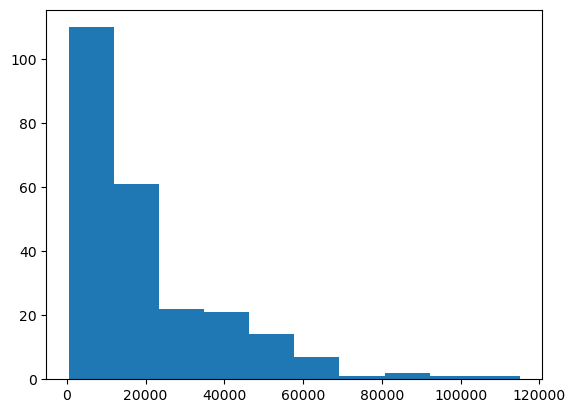

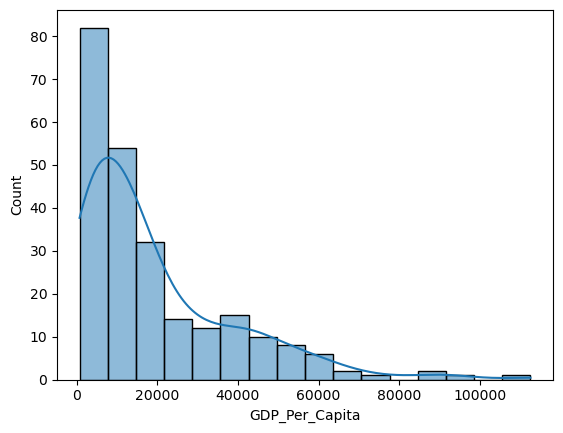

In [133]:
#8 histogram

#(link for help sns histogram: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751)
#(1st histogram based on datacamp notes / 2nd histogram using seaborn/sns....sns looks nicer)
plt.hist(gdp_2020.GDP_Per_Capita, range=(500, 115000)) 
plt.show()
sns.histplot(gdp_2020['GDP_Per_Capita'], kde=True)
plt.show()

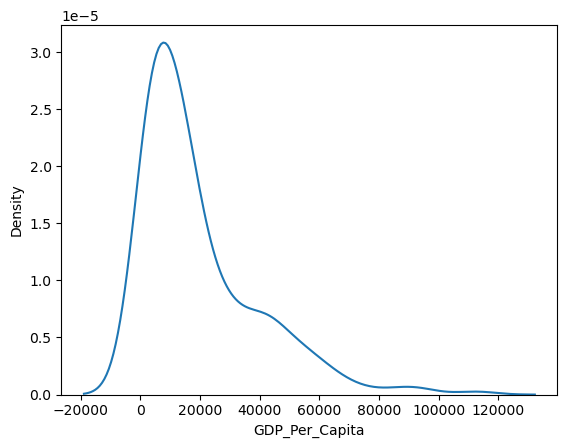

In [134]:
#8 density plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/density-plot/)
sns.kdeplot(gdp_2020['GDP_Per_Capita'])
plt.show()

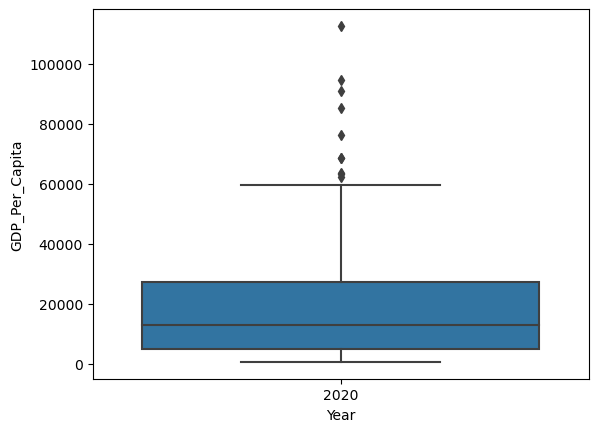

In [135]:
#8 box plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/boxplot/ )
sns.boxplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])
plt.show()

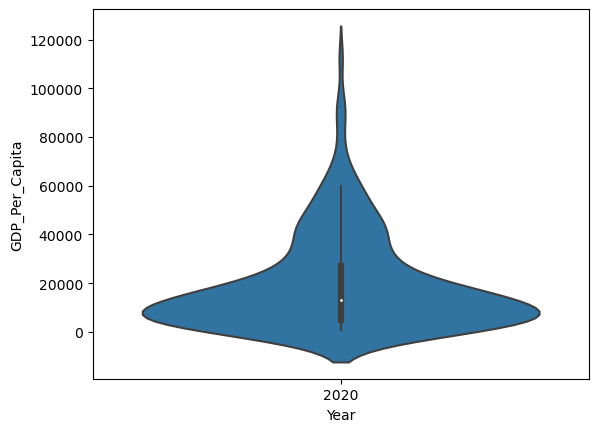

In [136]:
#8 violin plot (w/ seaborn)
# (Link for help: https://www.python-graph-gallery.com/violin-plot/ )
sns.violinplot(x = gdp_2020['Year'], y = gdp_2020['GDP_Per_Capita'])
plt.show()

#8 What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

Discussion: All of the plots show the greatest distribution for countries on the lowest end of the GDP scale. The density plot is the clearest of the 4 charts for me to read and understand. The density plot shows negative GDPs and the highest GDPs in the clearest way...they are also visible in the violin chart.

#9 What was the median GDP per capita value in 2020?

In [137]:
#9 median gdp for 2020
print(gdp_2020['GDP_Per_Capita'].median())

12908.9374056206


#10  For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [138]:
#10 new data frame gdp_decades
## (Link for help: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_decades= gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([1990, 2000, 2010, 2020 ]).any(axis=1)]
print(gdp_decades)
##row count of 918 is correct for 4 years selected


                          Country  Year  GDP_Per_Capita
0                     Afghanistan  2020     1970.560169
10                    Afghanistan  2010     1957.029070
19    Africa Eastern and Southern  2020     3491.978104
29    Africa Eastern and Southern  2010     3545.205203
39    Africa Eastern and Southern  2000     2915.472987
...                           ...   ...             ...
7144                       Zambia  1990     2190.181724
7145                     Zimbabwe  2020     2134.555461
7155                     Zimbabwe  2010     1813.531764
7165                     Zimbabwe  2000     2771.060576
7175                     Zimbabwe  1990     2652.129209

[918 rows x 3 columns]


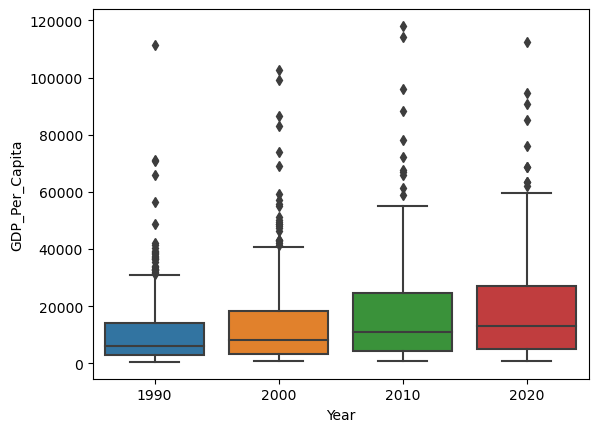

In [139]:
#10 box plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/boxplot/ )
sns.boxplot(x = gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])
plt.show()

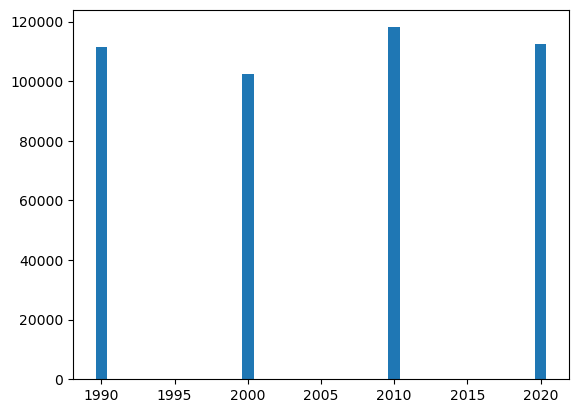

In [140]:
#10 bar plot (w/matplotlib)
# used datacamp notes
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.show()


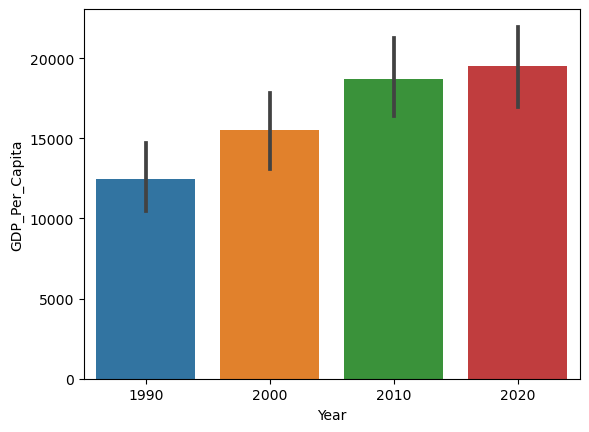

In [141]:
#10 bar plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/barplot/#Seaborn)
# note that the Seaborn alternative allows to write less code to build the chart, slighlty more limited in term of customization
sns.barplot(x=gdp_decades['Year'], y = gdp_decades['GDP_Per_Capita'])
plt.show()

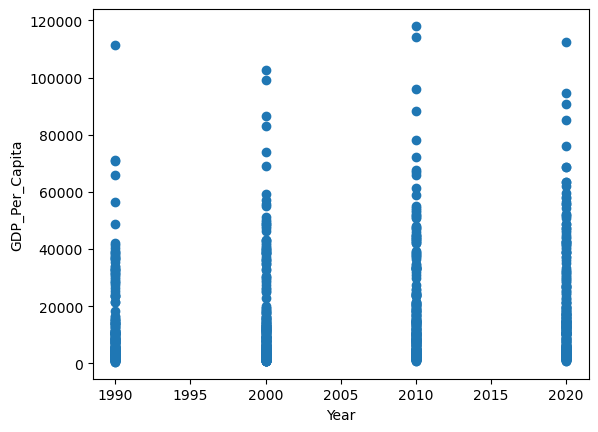

In [142]:
#10 scatter plot (w/ matplotlib)
# used datacamp notes
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP_Per_Capita')
plt.show()



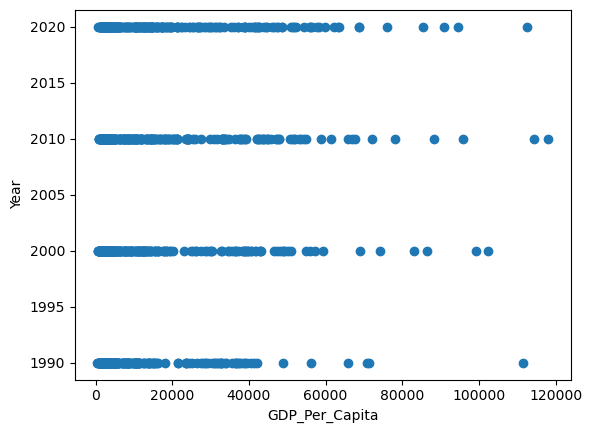

In [143]:
#10 scatter plot (w/ matplotlib)
# used datacamp notes / alt X & y axis
plt.scatter(gdp_decades.GDP_Per_Capita, gdp_decades.Year)
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Year')
plt.show()

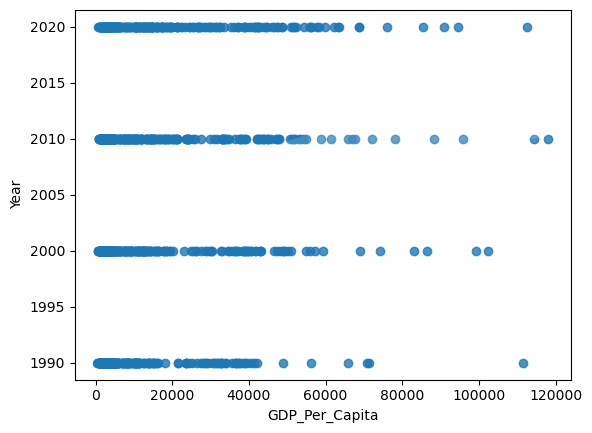

In [144]:
#10 scatter plot (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/scatter-plot/)
# (link for help: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
# trendline showed up w/o the line_kws info....adjusted settings to hide it
sns.regplot(x = gdp_decades['GDP_Per_Capita'], y = gdp_decades['Year'], line_kws={'color':'w', 'alpha':0.0, 'lw':0})
plt.show()

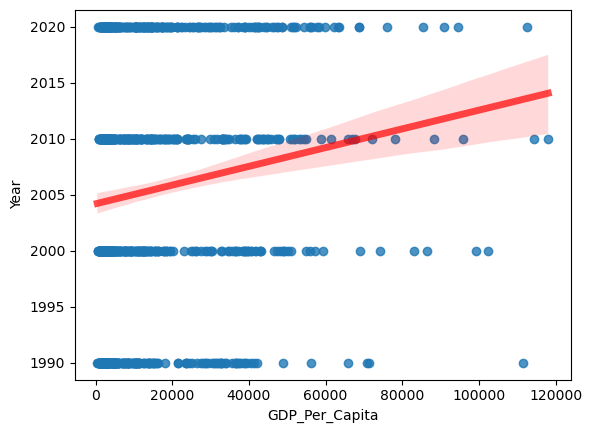

In [145]:
#10 scatter plot w/ trendline (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
sns.regplot(x = gdp_decades['GDP_Per_Capita'], y = gdp_decades['Year'], line_kws={'color':'r', 'alpha':0.7, 'lw':5})
plt.show()

#10 Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

Discussion: GDPs rose and steadily moved up across the decades. 

#11 Which country was the first to have a GDP per capita greater than $100,000?

In [146]:
#11 create data frame for 1990 info
## (Link for help: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
gdp_1990 = gdp_df[gdp_df[['Year','GDP_Per_Capita']].isin([1990, ]).any(axis=1)]
print(gdp_1990)


                          Country  Year  GDP_Per_Capita
49    Africa Eastern and Southern  1990     3083.976800
80     Africa Western and Central  1990     2810.341129
111                       Albania  1990     4827.034551
142                       Algeria  1990     8746.340762
173                        Angola  1990     5758.950488
...                           ...   ...             ...
7024                      Vanuatu  1990     2855.554643
7055                      Vietnam  1990     2066.372215
7113                        World  1990     9704.621768
7144                       Zambia  1990     2190.181724
7175                     Zimbabwe  1990     2652.129209

[206 rows x 3 columns]


In [147]:
#11 using filtered data frame
gdp_1990[np.logical_and(gdp_1990['Year'] == 1990, gdp_1990['GDP_Per_Capita'] > 100000)]

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


In [148]:
#11 using the numpy 'logical_' removed the need to use a separate filtered data frame
gdp_df[np.logical_and(gdp_df['Year'] == 1990, gdp_df['GDP_Per_Capita'] > 100000)]

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665


#12 Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [149]:
#12 
## thinking my way into the solution --- looking for something to cross reference
##gdp_2020[np.logical_and(gdp_2020['Year'] == 2020, gdp_2020['GDP_Per_Capita'].max())]
print(gdp_2020.GDP_Per_Capita.max())

112557.309471818


In [150]:
#12 filter for max gdp 2020
## i could not get this to work using just the gdp_df...it was able to isolate luxembourg when i referenced gdp_2020 data frame???
gdp_df[np.logical_and(gdp_df['Year'] == 2020, gdp_df['GDP_Per_Capita'] == gdp_2020.GDP_Per_Capita.max())]

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472


In [151]:
##12 filtering out just luxembourg
## help: datacamp intermediate python ch3 / filtering panda dataframes
gdp_lux = gdp_df['Country'] == 'Luxembourg'
print(gdp_lux)
print(gdp_df[gdp_lux])
gdp_lux_plot = gdp_df[gdp_lux]


0       False
1       False
2       False
3       False
4       False
        ...  
7171    False
7172    False
7173    False
7174    False
7175    False
Name: Country, Length: 7176, dtype: bool
         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472
3883  Luxembourg  2019   116518.276815
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3886  Luxembourg  2016   116283.699681
3887  Luxembourg  2015   113182.728563
3888  Luxembourg  2014   113313.578898
3889  Luxembourg  2013   113050.663254
3890  Luxembourg  2012   112137.135491
3891  Luxembourg  2011   112998.390477
3892  Luxembourg  2010   114343.988089
3893  Luxembourg  2009   112230.081410
3894  Luxembourg  2008   118154.667184
3895  Luxembourg  2007   120647.822959
3896  Luxembourg  2006   113346.035782
3897  Luxembourg  2005   108632.360016
3898  Luxembourg  2004   107634.837198
3899  Luxembourg  2003   104743.000088
3900  Luxembourg  2002   103317.331098
3901  Luxembourg  2001   

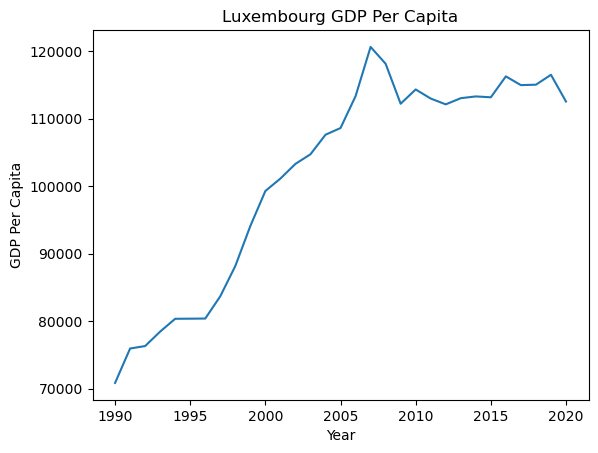

In [152]:
#12 line plot for luxembourg 1990-2020
## help: datacamp intro to data science in python
plt.plot(gdp_lux_plot.Year, gdp_lux_plot.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Luxembourg GDP Per Capita')
plt.show()

#13 13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [153]:
#13 following same pattern as #12 except changing .max to .min
print(gdp_2020.GDP_Per_Capita.min())

731.064073644609


In [154]:
#13 filter for min gdp 2020
## i could not get this to work using just the gdp_df...it was able to isolate luxembourg when i referenced gdp_2020 data frame?
gdp_df[np.logical_and(gdp_df['Year'] == 2020, gdp_df['GDP_Per_Capita'] == gdp_2020.GDP_Per_Capita.min())]

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074


In [155]:
#13 filtering out just burundi
## help: datacamp intermediate python ch3 / filtering panda dataframes
gdp_bur = gdp_df['Country'] == 'Burundi'
print(gdp_bur)
print(gdp_df[gdp_bur])
gdp_bur_plot = gdp_df[gdp_bur]

0       False
1       False
2       False
3       False
4       False
        ...  
7171    False
7172    False
7173    False
7174    False
7175    False
Name: Country, Length: 7176, dtype: bool
     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074
915  Burundi  2019      751.443405
916  Burundi  2018      761.524143
917  Burundi  2017      773.572859
918  Burundi  2016      794.604340
919  Burundi  2015      825.205574
920  Burundi  2014      886.235296
921  Burundi  2013      877.272857
922  Burundi  2012      862.715651
923  Burundi  2011      852.502576
924  Burundi  2010      846.169112
925  Burundi  2009      831.564843
926  Burundi  2008      827.792334
927  Burundi  2007      815.908213
928  Burundi  2006      815.053647
929  Burundi  2005      798.704845
930  Burundi  2004      817.461177
931  Burundi  2003      804.884232
932  Burundi  2002      839.777920
933  Burundi  2001      826.028960
934  Burundi  2000      828.000479
935  Burundi  1999      850.046951


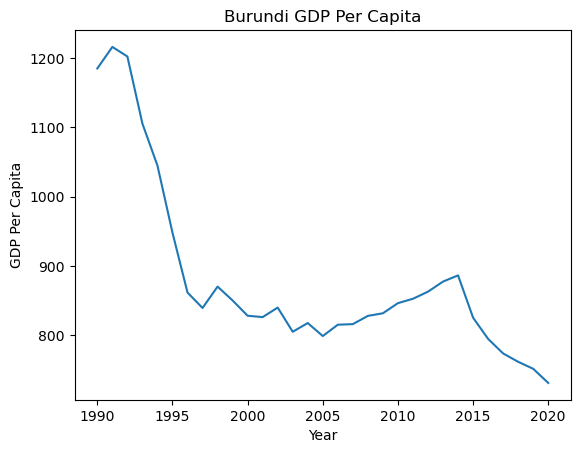

In [156]:
#13 line plot for Burundi 1990-2020
## help: datacamp intro to data science in python
plt.plot(gdp_bur_plot.Year, gdp_bur_plot.GDP_Per_Capita)
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('Burundi GDP Per Capita')
plt.show()

#13 skip bonus for now

#14 Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [157]:
#14 ...yep...got the errors...review csv using text editor. significant amount of garbage data at the bottom of the file (180 rows...not formatted correctly)
## (link for help: https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/)
## (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.htm)

internet_df = pd.read_csv('../data/internet_use.csv',skipfooter=180, engine='python', on_bad_lines='skip')
print(internet_df.head())
print(internet_df.tail(5))
print(internet_df.info())
print(internet_df.shape)
print(internet_df.describe())
print(internet_df.columns)
print(internet_df.index)

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null

#15 Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [158]:
#15 drop Value Footnotes column
print(internet_df.drop('Value Footnotes', axis=1, inplace=True))
print(internet_df.head())

None
  Country or Area  Year     Value
0     Afghanistan  2014  6.390000
1     Afghanistan  2013  5.900000
2     Afghanistan  2012  5.454545
3     Afghanistan  2011  5.000000
4     Afghanistan  2010  4.000000


In [159]:
#15 rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'
internet_df.rename({'Country or Area' : 'Country', 'Year' : 'Year', 'Value' : 'Internet_Users_Pct'}, axis=1, inplace=True)
print(internet_df.head())
print(internet_df.tail(5))
print(internet_df.info())
print(internet_df.shape)
print(internet_df.describe())
print(internet_df.columns)
print(internet_df.index)

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000
       Country  Year  Internet_Users_Pct
4490  Zimbabwe  1997            0.033080
4491  Zimbabwe  1996            0.016790
4492  Zimbabwe  1995            0.007684
4493  Zimbabwe  1994            0.001739
4494  Zimbabwe  1990            0.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
None
(4495, 3)
              Year  Internet_Users_Pct
count  4495.000000         4495.000000


#16 Look at the number of observations in this dataset per year. What do you notice?

discussion: number of observations....4495 rows including header. years range from 1960 - 2014. Years from 1960 - 1989 are zeros. 

#17 What is the first year to have a non-zero internet users percentage value?

0        True
1        True
2        True
3        True
4        True
        ...  
4490     True
4491     True
4492     True
4493     True
4494    False
Name: Internet_Users_Pct, Length: 4495, dtype: bool
          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
...           ...   ...                 ...
4489     Zimbabwe  1998            0.081648
4490     Zimbabwe  1997            0.033080
4491     Zimbabwe  1996            0.016790
4492     Zimbabwe  1995            0.007684
4493     Zimbabwe  1994            0.001739

[4106 rows x 3 columns]


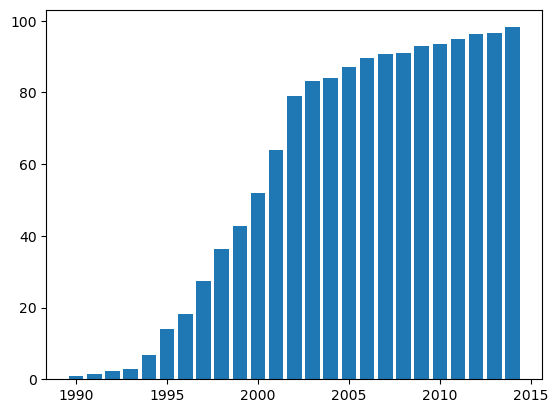

In [160]:
#17 filter for Internet_Users_Percent > 0
int_abv_zed = internet_df['Internet_Users_Pct'] > 0
print(int_abv_zed)
print(internet_df[int_abv_zed])
## review results in a bar chart...what year does this start at???
int_abv_zed_plot = internet_df[int_abv_zed]
plt.bar(int_abv_zed_plot.Year, int_abv_zed_plot.Internet_Users_Pct)
plt.show()

##discussion: 1990 is first year above 0 percent

#18 How does the distribution of internet users percent differ for 2000 and 2014?

In [161]:
#18 prep....filter for year 2000 & filter for 2014
#(link for helpto filter: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
int_2000 = internet_df[internet_df[['Year','Internet_Users_Pct']].isin([2000, ]).any(axis=1)]
print(int_2000)
print(int_2000['Internet_Users_Pct'].min())
print(int_2000['Internet_Users_Pct'].max())

int_2014 = internet_df[internet_df[['Year','Internet_Users_Pct']].isin([2014, ]).any(axis=1)]
print(int_2014)
print(int_2014['Internet_Users_Pct'].min())
print(int_2014['Internet_Users_Pct'].max())

                    Country  Year  Internet_Users_Pct
29                  Albania  2000            0.114097
50                  Algeria  2000            0.491706
72                  Andorra  2000           10.538836
92                   Angola  2000            0.105046
112     Antigua and Barbuda  2000            6.482226
...                     ...   ...                 ...
4403               Viet Nam  2000            0.254248
4423  Virgin Islands (U.S.)  2000           13.815081
4445                  Yemen  2000            0.082500
4465                 Zambia  2000            0.191072
4487               Zimbabwe  2000            0.401434

[199 rows x 3 columns]
0.0
52.0
                    Country  Year  Internet_Users_Pct
0               Afghanistan  2014                6.39
15                  Albania  2014               60.10
36                  Algeria  2014               18.09
59                  Andorra  2014               95.90
78                   Angola  2014               2

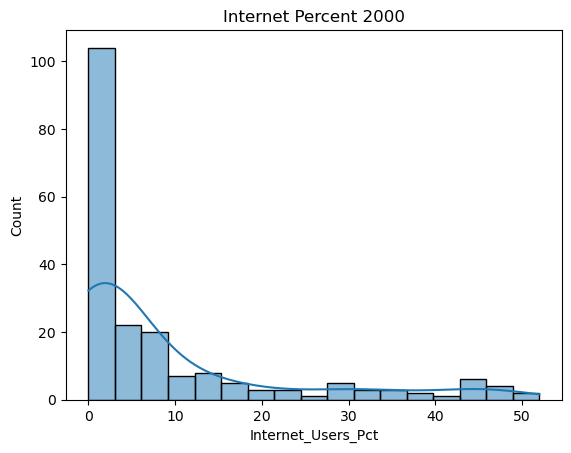

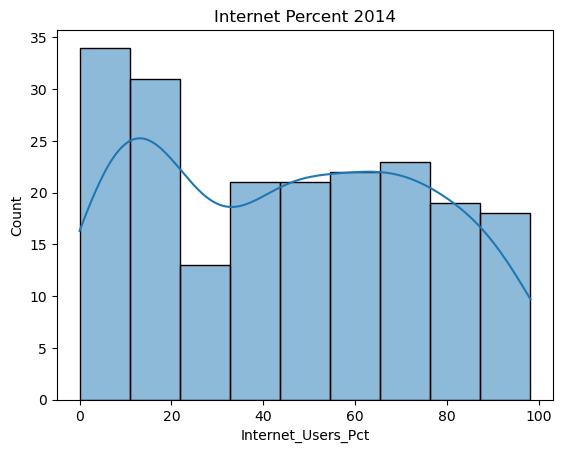

In [162]:
#18 seaborn histogram to show difference in distribution between 2000 & 2014
#(link for help sns histogram: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751)
sns.histplot(int_2000['Internet_Users_Pct'], kde=True).set(title='Internet Percent 2000')
plt.show()
sns.histplot(int_2014['Internet_Users_Pct'], kde=True).set(title='Internet Percent 2014')
plt.show()

          Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
15        Albania  2014           60.100000
29        Albania  2000            0.114097
36        Algeria  2014           18.090000
50        Algeria  2000            0.491706
...           ...   ...                 ...
4445        Yemen  2000            0.082500
4451       Zambia  2014           17.340000
4465       Zambia  2000            0.191072
4473     Zimbabwe  2014           19.890000
4487     Zimbabwe  2000            0.401434

[401 rows x 3 columns]


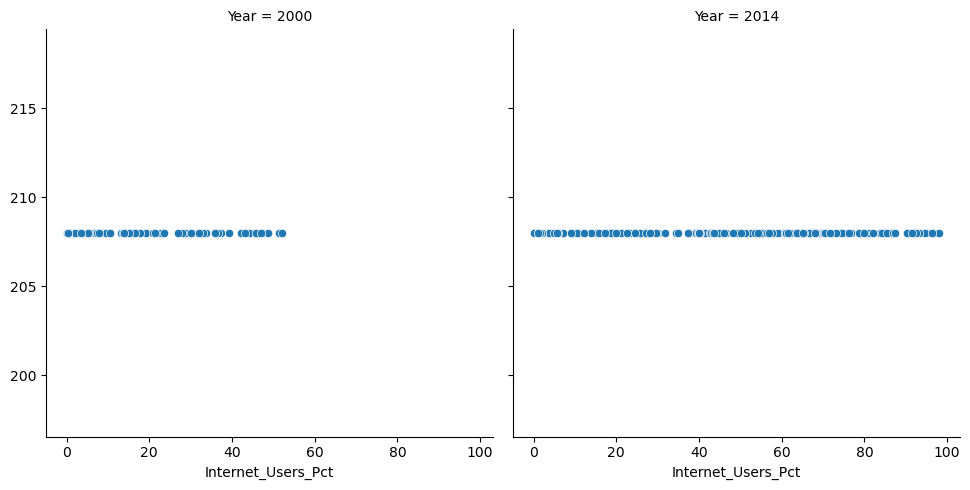

In [163]:
#18 trying an alt chart to view both years on single chart
## (link for help: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)
## (link for help: https://www.statology.org/seaborn-title/)
## (additional info: https://seaborn.pydata.org/generated/seaborn.relplot.html)
int_compare= internet_df[internet_df[['Year','Internet_Users_Pct']].isin([2000, 2014]).any(axis=1)]
print(int_compare)

##sns.relplot(data=int_compare, x=int_compare.groupby('Country').Country.nunique(), y='Internet_Users_Pct', col='Year')

sns.relplot(data=int_compare, x='Internet_Users_Pct', y=int_compare.Country.nunique(), col='Year')


#18 discussion: internet usage has grown and shifted with a significant portion of the population > 50%

#19 For how many countries was the percentage of internet users below 5% in 2014?

In [164]:
#19
## using int_2014 df from #18
## based code below on #17
int_blw_five = int_2014['Internet_Users_Pct'] < 5
print(int_blw_five)
print(int_2014[int_blw_five])
print(int_2014[int_blw_five].count())

#19 discussion: 16 countries in 2014 below 5%

0       False
15      False
36      False
59      False
78      False
        ...  
4389    False
4409    False
4431    False
4451    False
4473    False
Name: Internet_Users_Pct, Length: 202, dtype: bool
                                 Country  Year  Internet_Users_Pct
623                              Burundi  2014                1.38
762                 Central African Rep.  2014                4.03
782                                 Chad  2014                2.50
909   Congo (Democratic Republic of the)  2014                3.00
1065         Dem. People's Rep. of Korea  2014                0.00
1256                             Eritrea  2014                0.99
1299                            Ethiopia  2014                2.90
1720                              Guinea  2014                1.72
1742                       Guinea-Bissau  2014                3.32
2453                          Madagascar  2014                3.70
2814                             Myanmar  2014            

#20 Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

(link for help: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

(join help: https://www.freecodecamp.org/news/sql-outer-join-tutorial-with-example-syntax/#:~:text=The%20FULL%20OUTER%20JOIN%20(aka,as%20all%20of%20the%20orders. )
The FULL OUTER JOIN (aka OUTER JOIN ) is used to return all of the records that have values in either the left or right table.

In [165]:
#20 merge using outer join
## 8256 rows
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=['Country','Year'])
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail(5))
print(gdp_and_internet_use.info())
print(gdp_and_internet_use.shape)
print(gdp_and_internet_use.describe())
print(gdp_and_internet_use.columns)
print(gdp_and_internet_use.index)

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2020     1970.560169                 NaN
1  Afghanistan  2019     2065.036235                 NaN
2  Afghanistan  2018     2033.804389                 NaN
3  Afghanistan  2017     2058.400221                 NaN
4  Afghanistan  2016     2057.067978                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8251   Yemen  1999             NaN            0.056629
8252   Yemen  1998             NaN            0.023323
8253   Yemen  1997             NaN            0.015025
8254   Yemen  1996             NaN            0.000621
8255   Yemen  1990             NaN            0.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8256 entries, 0 to 8255
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             8256 non-null   object 
 1   Year                8256 non-null   int64  
 2   GDP_Per_Capita      7

#21 Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

#(link for help: https://www.statology.org/seaborn-title/)
#(additional info: https://seaborn.pydata.org/generated/seaborn.relplot.html) 


In [166]:
#21 Top 3 from 2014
##combination of code from #11 and (link for help: https://stackoverflow.com/questions/47462690/how-to-get-top-5-values-from-pandas-dataframe)

gdp_int_2014 = gdp_and_internet_use[gdp_and_internet_use[['Year','Internet_Users_Pct']].isin([2014, ]).any(axis=1)].sort_values('Internet_Users_Pct', ascending=False).head(3) 
print(gdp_int_2014)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30


In [167]:
#21 filter for iceland, bermuda, norway
## (link for help OR: https://stackoverflow.com/questions/29461185/filtering-pandas-dataframe-using-or-statement)
rvw_top3_2014 = gdp_and_internet_use[(gdp_and_internet_use['Country'] == 'Iceland') | (gdp_and_internet_use['Country'] == 'Bermuda') | (gdp_and_internet_use['Country'] == 'Norway')]
print(rvw_top3_2014)
print(rvw_top3_2014.head())
print(rvw_top3_2014.tail(5))

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
639   Bermuda  2020    76105.138057                 NaN
640   Bermuda  2019    81681.726668                 NaN
641   Bermuda  2018    81423.408453                 NaN
642   Bermuda  2017    81834.955874                 NaN
643   Bermuda  2016    78149.352535                 NaN
...       ...   ...             ...                 ...
7670  Iceland  1994             NaN            6.794812
7671  Iceland  1993             NaN            2.667825
7672  Iceland  1992             NaN            1.539160
7673  Iceland  1991             NaN            0.505129
7674  Iceland  1990             NaN            0.000000

[93 rows x 4 columns]
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
639  Bermuda  2020    76105.138057                 NaN
640  Bermuda  2019    81681.726668                 NaN
641  Bermuda  2018    81423.408453                 NaN
642  Bermuda  2017    81834.955874                 NaN
643  Bermuda  2016    78149.35

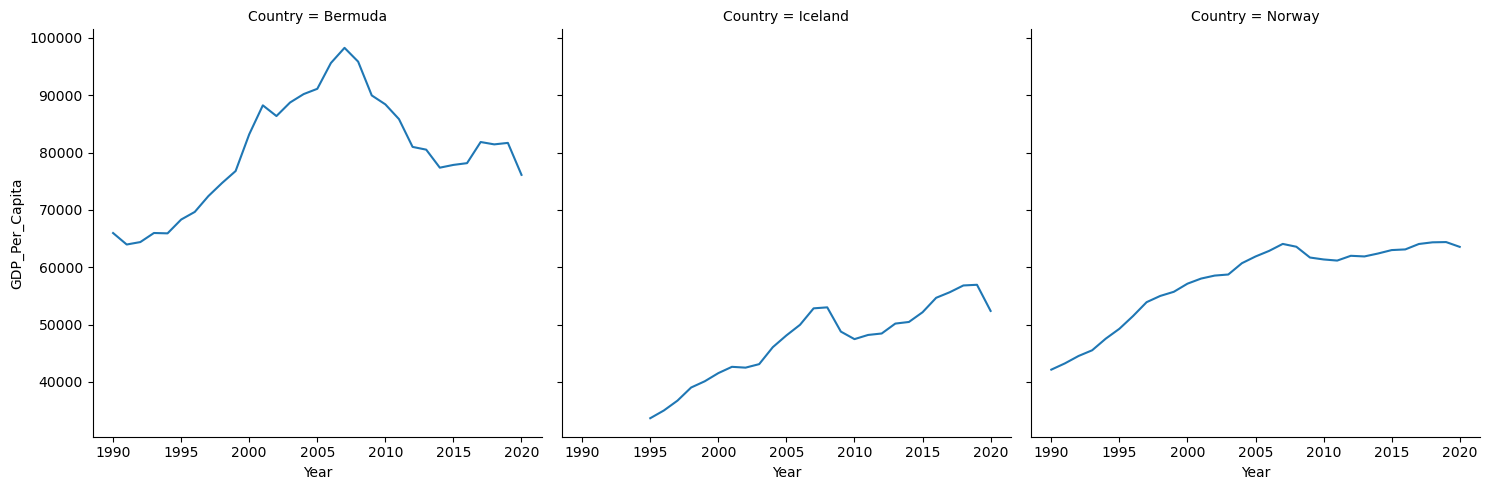

In [168]:
sns.relplot(data=rvw_top3_2014, x='Year', y='GDP_Per_Capita', col='Country', kind='line')
plt.show()

#21 compare how the GDP per capita has changed over time for these three countries. what do you notice?

discussion: first item I notice is overall gdp ranking between the 3: bermuda, norway, iceland. next I notice an increase and then decrease in gdp for each country between 2005 & 2010. Additionally each country had a downturn in gdp for 2020.

#22 Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

##adjusted code from #18 
#(link for helpto filter: https://sparkbyexamples.com/pandas/pandas-filter-rows-using-in-and-not-in-like-sql/)

In [169]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.isin([2014]).any(axis=1)]
print(gdp_and_internet_use_2014)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                     Afghanistan  2014     2102.384604                6.39
25    Africa Eastern and Southern  2014     3677.319414                 NaN
56     Africa Western and Central  2014     4215.646000                 NaN
87                        Albania  2014    11586.833878               60.10
118                       Algeria  2014    11512.690472               18.09
...                           ...   ...             ...                 ...
8147                       Turkey  2014             NaN               51.04
8170                    Venezuela  2014             NaN               57.00
8194                     Viet Nam  2014             NaN               48.31
8214        Virgin Islands (U.S.)  2014             NaN               50.07
8236                        Yemen  2014             NaN               22.55

[281 rows x 4 columns]


#23 23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

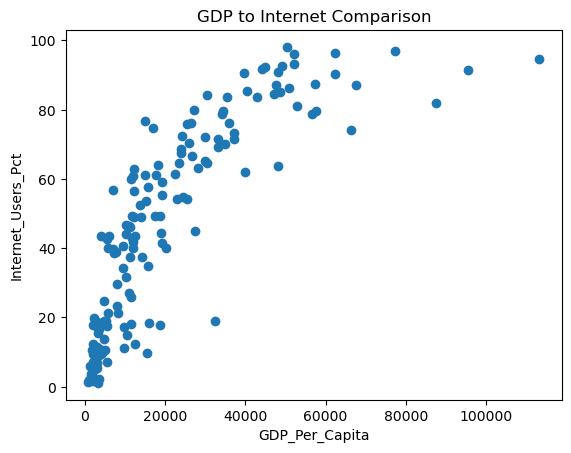

In [170]:
#23
# used datacamp notes / alt X & y axis
plt.scatter(gdp_and_internet_use_2014.GDP_Per_Capita, gdp_and_internet_use_2014.Internet_Users_Pct)
plt.xlabel('GDP_Per_Capita')
plt.ylabel('Internet_Users_Pct')
plt.title('GDP to Internet Comparison')
plt.show()

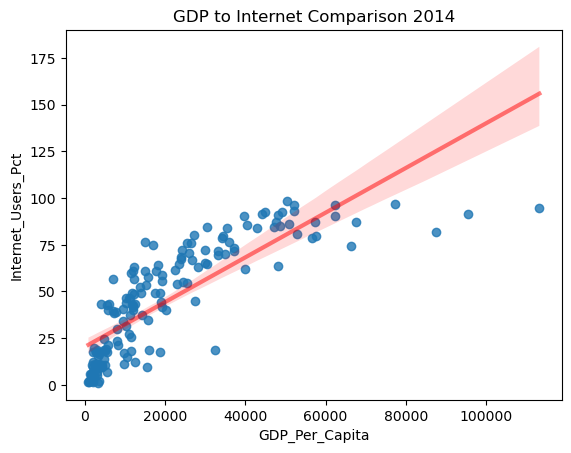

In [171]:
#23 alt scatter plot w/ trendline (w/ seaborn)
# (link for help: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
# (Additional help: https://seaborn.pydata.org/generated/seaborn.regplot.html)
# (Add title: https://www.statology.org/seaborn-title/)
sns.regplot(x = gdp_and_internet_use_2014['GDP_Per_Capita'], y = gdp_and_internet_use_2014['Internet_Users_Pct'], line_kws={'color':'r', 'alpha':0.5, 'lw':3}).set(title='GDP to Internet Comparison 2014')
plt.show()

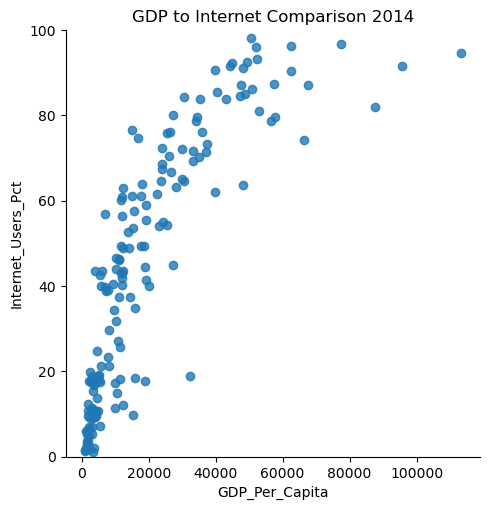

In [172]:
#23 alt scatter plot seaborn
##(link for help: https://www.python-graph-gallery.com/44-control-axis-limits-of-plot-seaborn)
sns.lmplot(x = 'GDP_Per_Capita', y='Internet_Users_Pct', data=gdp_and_internet_use_2014, fit_reg=False).set(title='GDP to Internet Comparison 2014')
plt.ylim(0,100)
plt.show()

In [173]:
#23 review outliers
int_2014_outlier = gdp_and_internet_use_2014[gdp_and_internet_use_2014[['Year','Internet_Users_Pct']].isin([2014, ]).any(axis=1)].sort_values('Internet_Users_Pct', ascending=False).head(3) 
print(int_2014_outlier)

gdp_2014_outlier = gdp_and_internet_use_2014[gdp_and_internet_use_2014[['Year','GDP_Per_Capita']].isin([2014, ]).any(axis=1)].sort_values('GDP_Per_Capita', ascending=False).head(3) 
print(gdp_2014_outlier)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2803  Iceland  2014    50450.741612               98.16
645   Bermuda  2014    77361.104881               96.80
4880   Norway  2014    62390.130313               96.30
               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3919  Macao SAR, China  2014   155201.740571                 NaN
3888        Luxembourg  2014   113313.578898               94.67
5387             Qatar  2014    95578.261511               91.49


#24 **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [174]:
#24 use qcut, place in 3 groups: low, medium, high
##(link for help: https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/)
##(link for help: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
##Example: pd.qcut(df.Year, q=5).head(7)

GDP_group = pd.qcut(gdp_and_internet_use_2014.GDP_Per_Capita, q=3,
                              labels=['low',
                                      'medium',
                                      'high'])
print(GDP_group)
print(gdp_and_internet_use_2014)


6          low
25         low
56         low
87      medium
118     medium
         ...  
8147       NaN
8170       NaN
8194       NaN
8214       NaN
8236       NaN
Name: GDP_Per_Capita, Length: 281, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']
                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6                     Afghanistan  2014     2102.384604                6.39
25    Africa Eastern and Southern  2014     3677.319414                 NaN
56     Africa Western and Central  2014     4215.646000                 NaN
87                        Albania  2014    11586.833878               60.10
118                       Algeria  2014    11512.690472               18.09
...                           ...   ...             ...                 ...
8147                       Turkey  2014             NaN               51.04
8170                    Venezuela  2014             NaN               57.00
8194                     Viet Nam  2014         

In [175]:
#24
##(link for help: #(link for help: https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/)
#(link for help: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html))
##gdp_and_internet_use_2014['GDP_group'] = GDP_group....did not use this code to add the column...used code below. 
gdp_and_internet_use_2014.insert(loc=4, column='GDP_group', value= GDP_group)
##commented out .insert above. it creates an error that tells you the column already exists after it has been ran once. 
print(gdp_and_internet_use_2014)
print(gdp_and_internet_use_2014.head())




                          Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                     Afghanistan  2014     2102.384604                6.39   
25    Africa Eastern and Southern  2014     3677.319414                 NaN   
56     Africa Western and Central  2014     4215.646000                 NaN   
87                        Albania  2014    11586.833878               60.10   
118                       Algeria  2014    11512.690472               18.09   
...                           ...   ...             ...                 ...   
8147                       Turkey  2014             NaN               51.04   
8170                    Venezuela  2014             NaN               57.00   
8194                     Viet Nam  2014             NaN               48.31   
8214        Virgin Islands (U.S.)  2014             NaN               50.07   
8236                        Yemen  2014             NaN               22.55   

     GDP_group  
6          low  
25         low  


25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?
##sns.relplot(data=rvw_top3_2014, x='Year', y='GDP_Per_Capita', col='Country', kind='line')
plt.show()

In [182]:
#25 checking median
#(link for help: https://stackoverflow.com/questions/29778636/median-of-pandas-dataframe-column)
gdp_and_internet_use_2014.describe()


,Year,GDP_Per_Capita,Internet_Users_Pct,iu_median
count,281.0,242.000000,202.000000,2.810000e+02
mean,2014.0,19612.875611,45.249851,4.465500e+01
std,0.0,20961.714572,29.573613,1.779526e-13
min,2014.0,822.611195,0.000000,4.465500e+01
25%,2014.0,4702.212961,17.517500,4.465500e+01
50%,2014.0,12178.874687,44.655000,4.465500e+01
75%,2014.0,26461.384188,69.945000,4.465500e+01
max,2014.0,155201.740571,98.160000,4.465500e+01


In [177]:
#25 alt check of median
#(link for help: https://stackoverflow.com/questions/29778636/median-of-pandas-dataframe-column)
gdp_and_internet_use_2014['Internet_Users_Pct'].median()

44.655

In [183]:
#25 prep to add a column
##i don't think this was actually needed...
#(link for help: https://stackoverflow.com/questions/29778636/median-of-pandas-dataframe-column)
iu_median = gdp_and_internet_use_2014['Internet_Users_Pct'].median()
print(gdp_and_internet_use_2014.head())
print(gdp_and_internet_use_2014.info())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                    Afghanistan  2014     2102.384604                6.39   
25   Africa Eastern and Southern  2014     3677.319414                 NaN   
56    Africa Western and Central  2014     4215.646000                 NaN   
87                       Albania  2014    11586.833878               60.10   
118                      Algeria  2014    11512.690472               18.09   

    GDP_group  iu_median  
6         low     44.655  
25        low     44.655  
56        low     44.655  
87     medium     44.655  
118    medium     44.655  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 6 to 8236
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             281 non-null    object  
 1   Year                281 non-null    int64   
 2   GDP_Per_Capita      242 non-null    float64 
 3   Internet_

In [186]:
##INCORRECT ASSUMPTIONS ON Q25 IGNORE THIS SECTION

25# add column to df
##i don't think this was actually needed... 
##gdp_and_internet_use_2014.insert(loc=5, column='iu_median', value= iu_median)
##drop it 'df.drop('column_name', axis=1, inplace=True)' / https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
gdp_and_internet_use_2014.drop('iu_median', axis = 1, inplace=True)
print(gdp_and_internet_use_2014.head())
print(gdp_and_internet_use_2014.info())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                    Afghanistan  2014     2102.384604                6.39   
25   Africa Eastern and Southern  2014     3677.319414                 NaN   
56    Africa Western and Central  2014     4215.646000                 NaN   
87                       Albania  2014    11586.833878               60.10   
118                      Algeria  2014    11512.690472               18.09   

    GDP_group  
6         low  
25        low  
56        low  
87     medium  
118    medium  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 6 to 8236
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             281 non-null    object  
 1   Year                281 non-null    int64   
 2   GDP_Per_Capita      242 non-null    float64 
 3   Internet_Users_Pct  202 non-null    float64 
 4   GDP_group           242 n

C:\Users\larld\AppData\Local\Temp\ipykernel_3260\1109577673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014.drop('iu_median', axis = 1, inplace=True)


<function matplotlib.pyplot.show(close=None, block=None)>

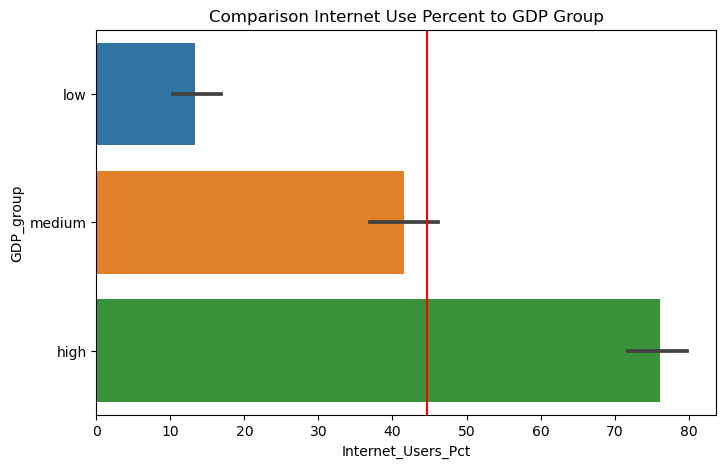

In [180]:
##INCORRECT ASSUMPTIONS ON Q25 IGNORE THIS SECTION

#25 #How does the median internet users percentage compare for the three gdp groups?
#chart 1 bar
#(link for help: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec)....really good chart examples w/. example code
#(more help: https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/)
plt.figure(figsize=(8,5))
sns.barplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_group')
plt.axvline(x= gdp_and_internet_use_2014.Internet_Users_Pct.median(), color='red')
plt.title('Comparison Internet Use Percent to GDP Group')
plt.show

<Figure size 1200x1200 with 0 Axes>

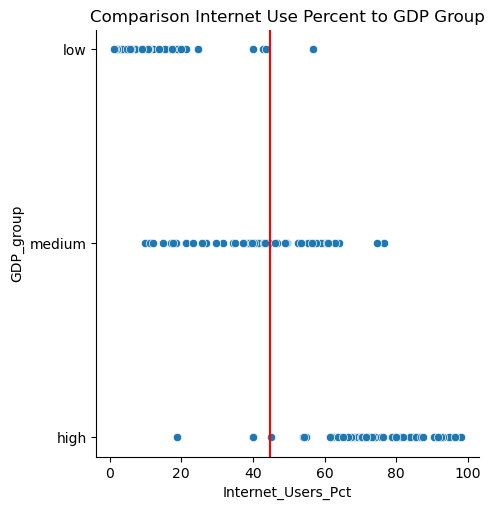

In [181]:
##INCORRECT ASSUMPTIONS ON Q25 IGNORE THIS SECTION

#25 #How does the median internet users percentage compare for the three gdp groups?
#chart 2 scatter
#(link for help: https://towardsdatascience.com/a-complete-guide-to-plotting-categorical-variables-with-seaborn-bfe54db66bec)....really good chart examples w/. example code
#(more help: https://datavizpyr.com/how-to-add-a-mean-median-line-to-a-seaborn-displot/)
##sns.relplot(data=gdp_and_internet_use_2014, x='GDP_group', y='Internet_Users_Pct', col='iu_median', kind='scatter')
plt.figure(figsize=(12,12))
sns.relplot(data=gdp_and_internet_use_2014, x='Internet_Users_Pct', y='GDP_group', kind='scatter')
plt.axvline(x= gdp_and_internet_use_2014.Internet_Users_Pct.median(), color='red')
plt.title('Comparison Internet Use Percent to GDP Group')
plt.show()

##REWORK Q25 AFTER DISCUSSION w/ INSTRUCTORS
##25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

##(link for help: https://www.geeksforgeeks.org/pandas-groupby-and-computing-median/)
##(help for as_index: https://towardsdatascience.com/all-about-pandas-groupby-explained-with-25-examples-494e04a8ef56#:~:text=If%20the%20output%20of%20a,DataFrame%20using%20the%20as_index%20parameter.&text=Just%20like%20we%20can%20aggregate,use%20multiple%20columns%20for%20grouping.&text=A%20group%20is%20generated%20for%20each%20store%2Dproduct%20group%20combination.)
##EXAMPLE
# perform groupby on continent and find median
# of wine_serving
## data.groupby(["continent"])["wine_servings"].median()


In [187]:
#25 REWORK
print(gdp_and_internet_use_2014.head())

                         Country  Year  GDP_Per_Capita  Internet_Users_Pct  \
6                    Afghanistan  2014     2102.384604                6.39   
25   Africa Eastern and Southern  2014     3677.319414                 NaN   
56    Africa Western and Central  2014     4215.646000                 NaN   
87                       Albania  2014    11586.833878               60.10   
118                      Algeria  2014    11512.690472               18.09   

    GDP_group  
6         low  
25        low  
56        low  
87     medium  
118    medium  


In [222]:
gdp_grp_int_compare_median = gdp_and_internet_use_2014.groupby('GDP_group', as_index=False)['Internet_Users_Pct'].median()
print(gdp_grp_int_compare_median)
gdp_grp_int_compare_median.rename(columns= {'GDP_group':'GDP_group', 'Internet_Users_Pct': 'Median_IU_Pct'}, inplace = True)
print(gdp_grp_int_compare_median)
 

  GDP_group  Internet_Users_Pct
0       low               10.60
1    medium               43.00
2      high               78.74
  GDP_group  Median_IU_Pct
0       low          10.60
1    medium          43.00
2      high          78.74


<function matplotlib.pyplot.show(close=None, block=None)>

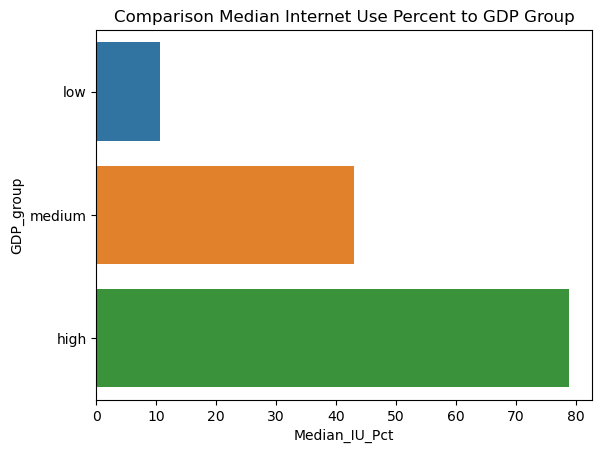

In [223]:
sns.barplot(data=gdp_grp_int_compare_median, x='Median_IU_Pct', y='GDP_group')
plt.title('Comparison Median Internet Use Percent to GDP Group')
plt.show


#### Bonus exercise:
#1    Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.